In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
from itertools import chain
from random import sample 
import scipy
import pydicom

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(10)

Image Index                            Finding Labels  \
81660   00020080_003.png                                No Finding   
80034   00019658_001.png                              Infiltration   
68262   00016841_002.png  Atelectasis|Cardiomegaly|Effusion|Nodule   
15987   00004246_000.png                                No Finding   
53689   00013558_003.png                              Pneumothorax   
13606   00003528_015.png                     Effusion|Infiltration   
11906   00003103_001.png                                No Finding   
17185   00004605_020.png                                      Mass   
51765   00013073_006.png                           Effusion|Nodule   
104100  00027789_002.png                                No Finding   

        Follow-up #  Patient ID  Patient Age Patient Gender View Position  \
81660             3       20080           18              M            AP   
80034             1       19658           67              F            PA   
68262             2       16841           51              M            PA   
15987             0        4246           60              M            PA   
53689             3       13558           50              F            PA   
13606            15        3528           46              M            AP   
11906             1        3103           29              F            PA   
17185            20        4605           17              M            PA   
51765             6       13073           68              F            AP   
104100            2       27789           51              M            AP   

        OriginalImage[Width  Height]  OriginalImagePixelSpacing[x     y]  \
81660                  3056     2544                        0.139  0.139   
80034                  2938     2991                        0.143  0.143   
68262                  2854     2597                        0.143  0.143   
15987                  2500     2048                        0.171  0.171   
53689                  2992     2991                        0.143  0.143   
13606                  2500     2048                        0.168  0.168   
11906                  2048     2500                        0.168  0.168   
17185                  2666     2393                        0.143  0.143   
51765                  2500     2048                        0.168  0.168   
104100                 3056     2544                        0.139  0.139   

        Unnamed: 11  
81660           NaN  
80034           NaN  
68262           NaN  
15987           NaN  
53689           NaN  
13606           NaN  
11906           NaN  
17185           NaN  
51765           NaN  
104100          NaN

In [3]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(10)

Image Index             Finding Labels  Follow-up #  Patient ID  \
3887  00019150_008.png               Infiltration            8       19150   
1326  00006952_008.png               Infiltration            8        6952   
3134  00015442_033.png                 No Finding           33       15442   
3290  00016240_002.png                     Nodule            2       16240   
1927  00010032_010.png                       Mass           10       10032   
1500  00007816_006.png               Infiltration            6        7816   
4352  00021494_007.png                     Nodule            7       21494   
4698  00023883_000.png                 No Finding            0       23883   
4856  00025529_001.png                 No Finding            1       25529   
635   00003292_009.png  Atelectasis|Consolidation            9        3292   

     Patient Age Patient Gender View Position  OriginalImageWidth  \
3887        069Y              M            AP                3056   
1326        030Y              M            AP                2500   
3134        062Y              F            AP                3056   
3290        057Y              M            PA                2021   
1927        066Y              F            AP                2500   
1500        065Y              F            PA                2838   
4352        037Y              F            PA                2992   
4698        023Y              F            PA                2754   
4856        035Y              M            PA                3056   
635         061Y              M            AP                2500   

      OriginalImageHeight  OriginalImagePixelSpacing_x  \
3887                 2544                     0.139000   
1326                 2048                     0.171000   
3134                 2544                     0.139000   
3290                 2011                     0.194311   
1927                 2048                     0.168000   
1500                 2991                     0.143000   
4352                 2991                     0.143000   
4698                 2617                     0.143000   
4856                 2544                     0.139000   
635                  2048                     0.171000   

      OriginalImagePixelSpacing_y  
3887                     0.139000  
1326                     0.171000  
3134                     0.139000  
3290                     0.194311  
1927                     0.168000  
1500                     0.143000  
4352                     0.143000  
4698                     0.143000  
4856                     0.139000  
635                      0.171000

In [5]:
## EDA
# Todo 

## Check for null values

all_xray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.3+ MB


In [6]:
all_xray_df.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
      dtype='object')

In [7]:
all_xray_df.shape

(112120, 12)

## Patient Gender

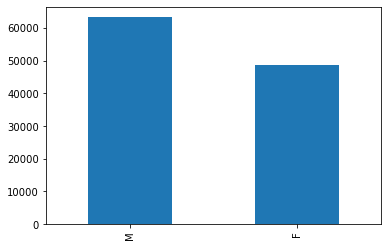

In [9]:
all_xray_df['Patient Gender'].value_counts().plot(kind='bar')

In [10]:
all_xray_df['Patient Gender'].describe()

count     112120
unique         2
top            M
freq       63340
Name: Patient Gender, dtype: object

## Patient Age

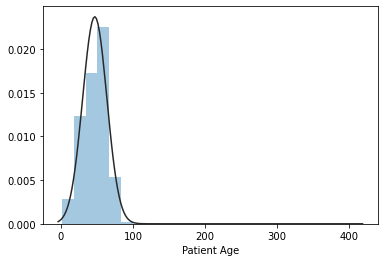

In [11]:
from scipy.stats import norm
sns.distplot(all_xray_df['Patient Age'], hist=True, bins=25, fit=norm, kde=False)

In [12]:
all_xray_df['Patient Age'].describe()

count    112120.000000
mean         46.901463
std          16.839923
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max         414.000000
Name: Patient Age, dtype: float64

## Patient View Position

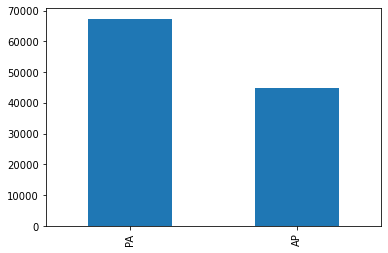

In [13]:
all_xray_df['View Position'].value_counts().plot(kind='bar')

In [14]:
all_xray_df['View Position'].describe()

count     112120
unique         2
top           PA
freq       67310
Name: View Position, dtype: object

## Analysis 1 

1. After plotting patient's age and gender, we can clearly see that majority of the data consists of male samples and average age is around 47.

2. By analysing patient view postion we have majority cases taken as PA. and the questiom is what is PA and AP. 

3. PA X-ray: An X-ray picture in which the beams pass from back-to-front (posteroanterior). As opposed to an AP (anteroposterior) image in which the rays pass through the body from front-to-back.

4. AP, X-ray: An X-ray picture in which the beams pass from front-to-back (anteroposterior). As opposed to a PA (posteroanterior) film in which the rays pass through the body from back-to-front.

**Definition source:** [medicinenet](https://www.medicinenet.com/ap_x-ray/definition.htm)

## Number of Pneumonia VS Non Pneumonia Cases

Here we are splitting up the 'Finding Labels' column into one additional column per disease (e.g. one for 'Cardiomegaly', one for 'Emphysema', etc.) and put a binary flag in that column to indicate the presence of the disease.

In [15]:
## Pre processing on dataframe

all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [16]:
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(5)

Image Index                            Finding Labels  \
52663  00013284_000.png                                No Finding   
80758  00019847_001.png                                No Finding   
38588  00010077_009.png                                No Finding   
89634  00022255_001.png                                No Finding   
84066  00020671_010.png  Effusion|Pleural_Thickening|Pneumothorax   

       Follow-up #  Patient ID  Patient Age Patient Gender View Position  \
52663            0       13284           34              M            PA   
80758            1       19847           31              M            PA   
38588            9       10077           70              M            PA   
89634            1       22255           69              M            PA   
84066           10       20671           39              M            PA   

       OriginalImage[Width  Height]  OriginalImagePixelSpacing[x  ...  \
52663                 2992     2991                        0.143  ...   
80758                 2806     2991                        0.143  ...   
38588                 2990     2991                        0.143  ...   
89634                 2992     2991                        0.143  ...   
84066                 2690     2991                        0.143  ...   

       Emphysema  Fibrosis  Hernia  Infiltration  Mass  No Finding  Nodule  \
52663        0.0       0.0     0.0           0.0   0.0         1.0     0.0   
80758        0.0       0.0     0.0           0.0   0.0         1.0     0.0   
38588        0.0       0.0     0.0           0.0   0.0         1.0     0.0   
89634        0.0       0.0     0.0           0.0   0.0         1.0     0.0   
84066        0.0       0.0     0.0           0.0   0.0         0.0     0.0   

       Pleural_Thickening  Pneumonia  Pneumothorax  
52663                 0.0        0.0           0.0  
80758                 0.0        0.0           0.0  
38588                 0.0        0.0           0.0  
89634                 0.0        0.0           0.0  
84066                 1.0        0.0           1.0  

[5 rows x 27 columns]

In [17]:
pos_cnt = all_xray_df['Patient ID'][all_xray_df['Pneumonia'] == 1].value_counts().sum()
neg_cnt = all_xray_df['Patient ID'][all_xray_df['Pneumonia'] == 0].value_counts().sum()
print('Pneumonia Cases: %s and Non-Pneumonia Cases: %s' % (pos_cnt, neg_cnt))

Pneumonia Cases: 1431 and Non-Pneumonia Cases: 110689


## Analyzing Pneumonia Cases

#### Gender Distribution

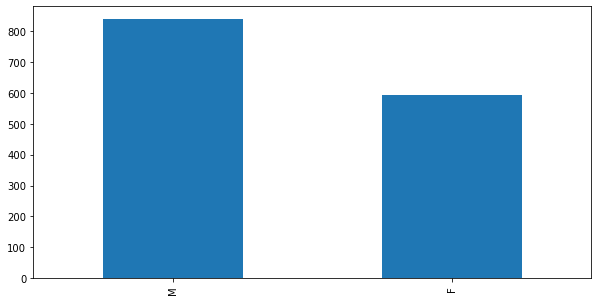

In [23]:
plt.figure(figsize=(10,5))
all_xray_df[all_xray_df['Pneumonia'] == 1]['Patient Gender'].value_counts().plot(kind='bar')

#### Age Distribution

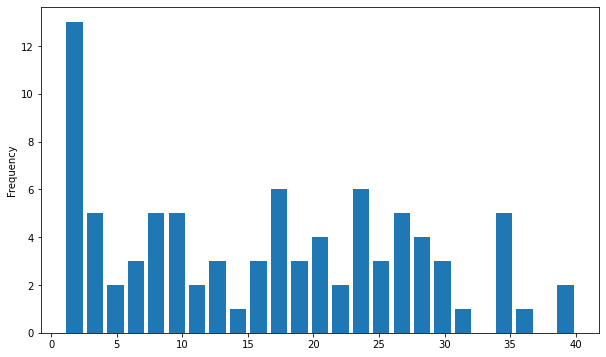

In [24]:
plt.figure(figsize=(10,6))
all_xray_df[all_xray_df['Pneumonia'] == 1]['Patient Age'].value_counts().plot(kind='hist', bins=25, rwidth=0.8)

In [25]:
all_xray_df[all_xray_df['Pneumonia'] == 1]['Patient Age'].value_counts().describe()

count    87.000000
mean     16.448276
std      11.060887
min       1.000000
25%       6.000000
50%      17.000000
75%      25.000000
max      40.000000
Name: Patient Age, dtype: float64

## Analysis 2

1. Here we can clearly see that, we have 1431 cases of pneumonia and 110689 cases of non-pneumonia.
2. On analyzing pneumonia cases we can clearly see that we have majority male cases and with average age of patient suffering from pneumonia being 16 years.
3. We can clearly see that there is a huge imbalance in tha data set, we have very few examples of positive cases which can create a hindrance while trainng our model. We can adopt following well known techniques to deal with imbalance situations: -
    3.1 Random Undersampling and Oversampling - here what we do is, we remove samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).
    3.2 Undersampling and Oversampling using imbalanced-learn - imbalanced-learn(imblearn) is a Python Package to tackle the curse of imbalanced datasets. It provides a variety of methods to undersample and oversample like Undersampling using Tomek Links, Oversampling using SMOTE etc.
    3.3 Changing Evaluation Metrics

**Imbalance Handling Source:** [kdnuggets.com](https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html#:~:text=Random%20Undersampling%20and%20Oversampling&text=A%20widely%20adopted%20and%20perhaps,class%20(over%2Dsampling).) 

## The distribution of other diseases that are comorbid with pneumonia

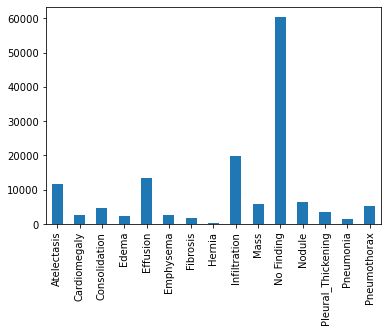

In [26]:
all_xray_df[all_labels].sum().plot(kind='bar')

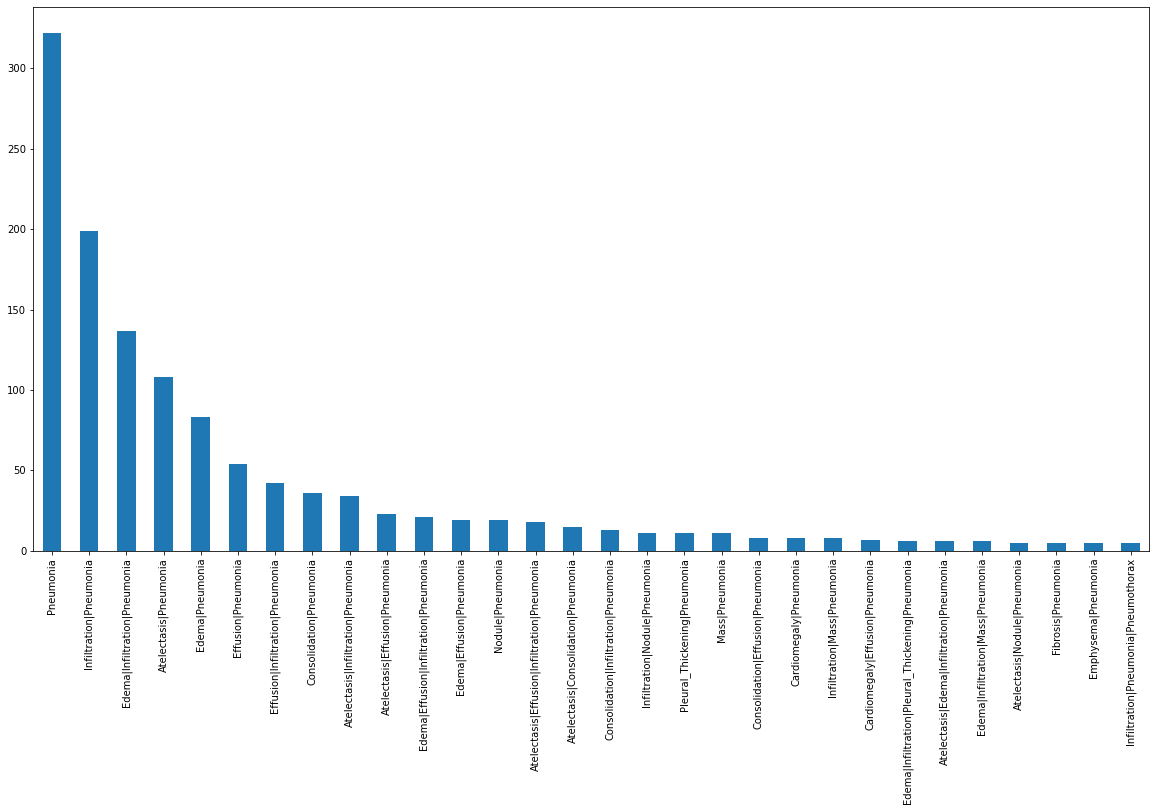

In [27]:
plt.figure(figsize=(20,10))
all_xray_df[all_xray_df['Pneumonia'] == 1]['Finding Labels'].value_counts()[:30].plot(kind='bar')

## Analysis 3

Here after plotting the distribution of occurence of other diseases with pneumonia, we can see that most commonly occuring diseases with pneumonia are Infiltration, Edemal, Atelectasis and consolidation.

## Number of disease per patient

In [28]:
all_xray_df.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x  ...  Emphysema  Fibrosis  Hernia  \
0                        0.143  ...        0.0       0.0     0.0   
1                        0.143  ...        1.0       0.0     0.0   
2                        0.168  ...        0.0       0.0     0.0   
3                        0.171  ...        0.0       0.0     0.0   
4                        0.143  ...        0.0       0.0     1.0   

   Infiltration  Mass  No Finding  Nodule  Pleural_Thickening  Pneumonia  \
0           0.0   0.0         0.0     0.0                 0.0        0.0   
1           0.0   0.0         0.0     0.0                 0.0        0.0   
2           0.0   0.0         0.0     0.0                 0.0        0.0   
3           0.0   0.0         1.0     0.0                 0.0        0.0   
4           0.0   0.0         0.0     0.0                 0.0        0.0   

   Pneumothorax  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

[5 rows x 27 columns]

In [29]:
print(all_labels)

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [30]:
all_xray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
 12  Atelectasis                  112120 non-null  float64
 13 

In [31]:
subset_df = all_xray_df.iloc[:,12:27].copy()
subset_df.head()

Atelectasis  Cardiomegaly  Consolidation  Edema  Effusion  Emphysema  \
0          0.0           1.0            0.0    0.0       0.0        0.0   
1          0.0           1.0            0.0    0.0       0.0        1.0   
2          0.0           1.0            0.0    0.0       1.0        0.0   
3          0.0           0.0            0.0    0.0       0.0        0.0   
4          0.0           0.0            0.0    0.0       0.0        0.0   

   Fibrosis  Hernia  Infiltration  Mass  No Finding  Nodule  \
0       0.0     0.0           0.0   0.0         0.0     0.0   
1       0.0     0.0           0.0   0.0         0.0     0.0   
2       0.0     0.0           0.0   0.0         0.0     0.0   
3       0.0     0.0           0.0   0.0         1.0     0.0   
4       0.0     1.0           0.0   0.0         0.0     0.0   

   Pleural_Thickening  Pneumonia  Pneumothorax  
0                 0.0        0.0           0.0  
1                 0.0        0.0           0.0  
2                 0.0        0.0           0.0  
3                 0.0        0.0           0.0  
4                 0.0        0.0           0.0

In [32]:
subset_df.drop('No Finding', axis=1, inplace=True)

In [33]:
subset_df.head()

Atelectasis  Cardiomegaly  Consolidation  Edema  Effusion  Emphysema  \
0          0.0           1.0            0.0    0.0       0.0        0.0   
1          0.0           1.0            0.0    0.0       0.0        1.0   
2          0.0           1.0            0.0    0.0       1.0        0.0   
3          0.0           0.0            0.0    0.0       0.0        0.0   
4          0.0           0.0            0.0    0.0       0.0        0.0   

   Fibrosis  Hernia  Infiltration  Mass  Nodule  Pleural_Thickening  \
0       0.0     0.0           0.0   0.0     0.0                 0.0   
1       0.0     0.0           0.0   0.0     0.0                 0.0   
2       0.0     0.0           0.0   0.0     0.0                 0.0   
3       0.0     0.0           0.0   0.0     0.0                 0.0   
4       0.0     1.0           0.0   0.0     0.0                 0.0   

   Pneumonia  Pneumothorax  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [34]:
all_xray_df['Disease Count'] = subset_df.sum(axis=1)

In [35]:
all_xray_df.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x  ...  Fibrosis  Hernia  Infiltration  Mass  \
0                        0.143  ...       0.0     0.0           0.0   0.0   
1                        0.143  ...       0.0     0.0           0.0   0.0   
2                        0.168  ...       0.0     0.0           0.0   0.0   
3                        0.171  ...       0.0     0.0           0.0   0.0   
4                        0.143  ...       0.0     1.0           0.0   0.0   

   No Finding  Nodule  Pleural_Thickening  Pneumonia  Pneumothorax  \
0         0.0     0.0                 0.0        0.0           0.0   
1         0.0     0.0                 0.0        0.0           0.0   
2         0.0     0.0                 0.0        0.0           0.0   
3         1.0     0.0                 0.0        0.0           0.0   
4         0.0     0.0                 0.0        0.0           0.0   

   Disease Count  
0            1.0  
1            2.0  
2            2.0  
3            0.0  
4            1.0  

[5 rows x 28 columns]

In [36]:
all_xray_df['Disease Count'].value_counts()

0.0    60361
1.0    30963
2.0    14306
3.0     4856
4.0     1247
5.0      301
6.0       67
7.0       16
9.0        2
8.0        1
Name: Disease Count, dtype: int64

Text(0, 0.5, 'Patients Count')

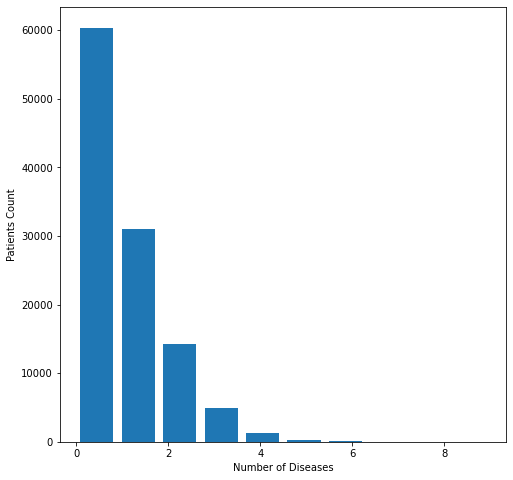

In [37]:
plt.figure(figsize=(8,8))
plt.hist(all_xray_df['Disease Count'], rwidth=0.8)
plt.xlabel('Number of Diseases')
plt.ylabel('Patients Count')

## Analysis 4

From the above manipulations to dataframe, we have calculated a new column named **Disease Count** and we can clearly see that there are 30963 patients with one disease, 14306 patients with two diseases, and 4856 with three diseases respectively

## Pixel-level assessments of the Imaging Data

In [38]:
## Let's examine one DICOM file and its contents 

dcm = pydicom.dcmread('test1.dcm')
dcm

(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.110503645592756492463169821050252582267888
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'No Finding'
(0010, 0020) Patient ID                          LO: '2'
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's Age                       AS: '81'
(0018, 0015) Body Part Examined                  CS: 'CHEST'
(0018, 5100) Patient Position                    CS: 'PA'
(0020, 000d) Study Instance UID                  UI: 1.3.6.1.4.1.11129.5.5.112507010803284478207522016832191866964708
(0020, 000e) Series Instance UID                 UI: 1.3.6.1.4.1.11129.5.5.112630850362182468372440828755218293352329
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows       

In [39]:
## Let's do some exploratory work before about how to extract these attributes

print('Patient ID: ',dcm.PatientID)
print('Patient Age: ',dcm.PatientAge)
print('Patient Sex: ',dcm.PatientSex)
print('Modality: ',dcm.Modality)
print('Study Description: ',dcm.StudyDescription)
print('Rows in Image: ',dcm.Rows)
print('Columns in Image: ',dcm.Columns)

Patient ID:  2
Patient Age:  81
Patient Sex:  M
Modality:  DX
Study Description:  No Finding
Rows in Image:  1024
Columns in Image:  1024


In [40]:
## Now we create dataframe from dicom files with necessary attributes

dicom_files = glob('*.dcm')

dicom_data = []

for file in dicom_files: 
    dcm = pydicom.dcmread(file)
    attr = [dcm.PatientID, dcm.PatientAge, dcm.PatientSex, dcm.Modality, dcm.StudyDescription,
             dcm.Rows, dcm.Columns]
    dicom_data.append(attr)

In [41]:
dicom_data

[['2', '81', 'M', 'CT', 'No Finding', 1024, 1024],
 ['2', '81', 'M', 'DX', 'No Finding', 1024, 1024],
 ['2', '81', 'M', 'DX', 'No Finding', 1024, 1024],
 ['1', '58', 'M', 'DX', 'Cardiomegaly', 1024, 1024],
 ['61', '77', 'M', 'DX', 'Effusion', 1024, 1024],
 ['2', '81', 'M', 'DX', 'No Finding', 1024, 1024]]

In [42]:
dicom_df = pd.DataFrame(dicom_data, columns=['PatientID','PatientAge','PatientSex','Modality',
                                        'StudyDescription','Rows','Columns'])

In [43]:
dicom_df.head()

PatientID PatientAge PatientSex Modality StudyDescription  Rows  Columns
0         2         81          M       CT       No Finding  1024     1024
1         2         81          M       DX       No Finding  1024     1024
2         2         81          M       DX       No Finding  1024     1024
3         1         58          M       DX     Cardiomegaly  1024     1024
4        61         77          M       DX         Effusion  1024     1024

In [44]:
def plot_distribution(dcm, finding):
    img_arr = dcm.pixel_array
    
    ## normalize image
    mean, std = np.mean(img_arr), np.std(img_arr)
    img_arr = (img_arr - mean)/std
    
    ## plotting image and its pixel intensity distribution
    
    fig = plt.figure()
    fig.set_figwidth(20)
    
    ## Plotting Image
    
    sub1 = fig.add_subplot(1,2,1)
    sub1.set_title('X-Ray Image with ' + finding)
    sub1.imshow(img_arr, cmap='gray')
    
    ## Plotting Pixel Intensity
    
    sub2 = fig.add_subplot(1,2,2)
    sub2.set_title('Pixel Intensity Distribution of Image with ' + finding)
    plt.hist(img_arr.ravel(), bins=256)
    
    

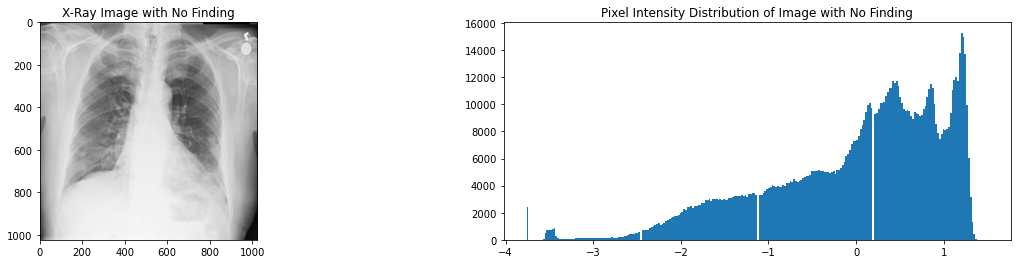

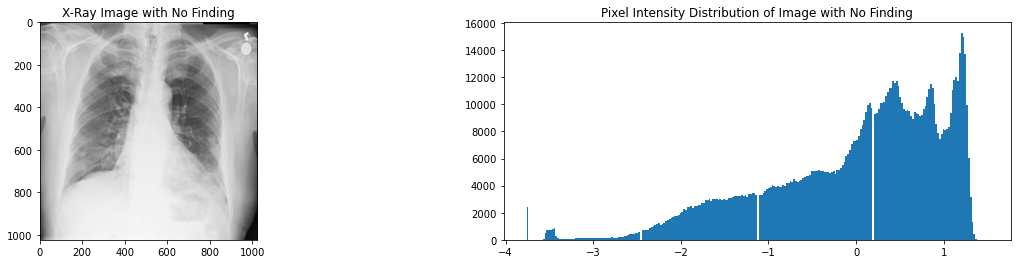

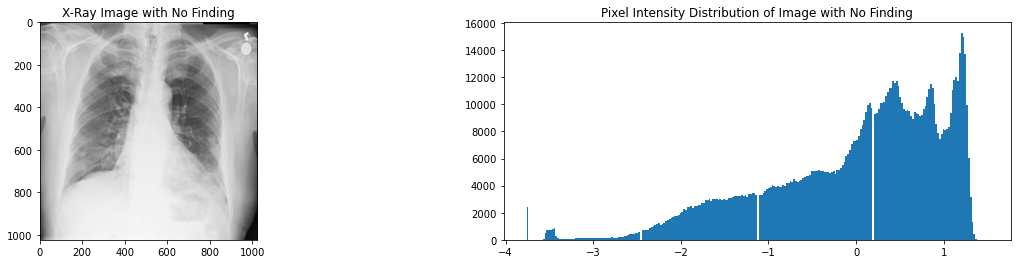

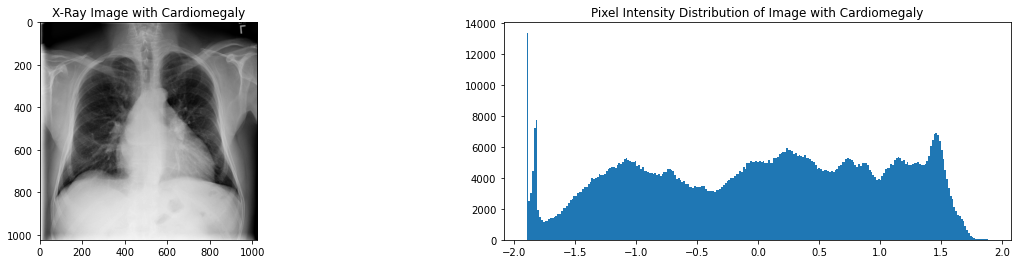

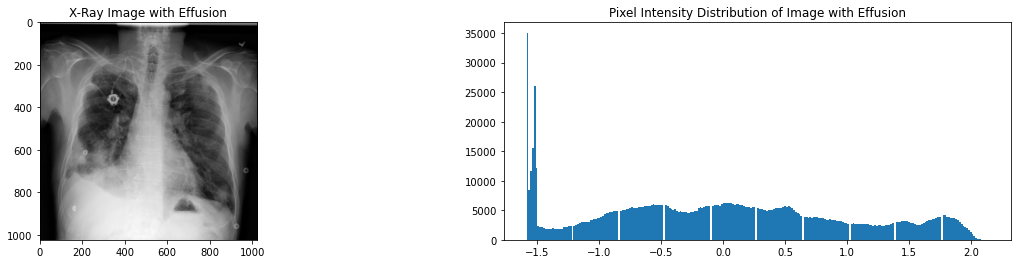

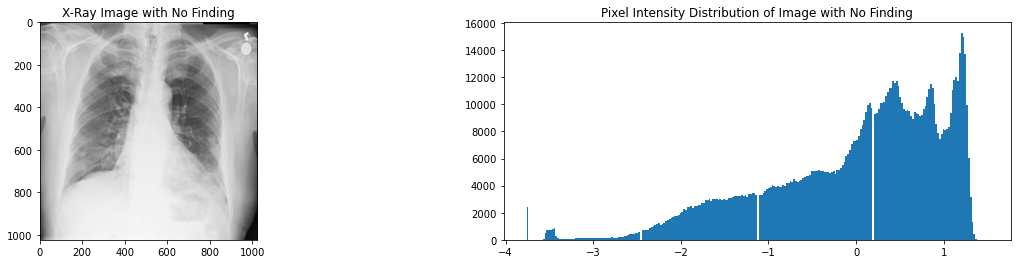

In [45]:
for file in dicom_files: 
    dcm = pydicom.dcmread(file)
    plot_distribution(dcm, dcm.StudyDescription)

## Note: use full NIH data to perform the first a few EDA items and use sample_labels.csv for the pixel-level assassements.

In [46]:
sample_df.head()

Image Index                                     Finding Labels  \
0  00000013_005.png  Emphysema|Infiltration|Pleural_Thickening|Pneu...   
1  00000013_026.png                             Cardiomegaly|Emphysema   
2  00000017_001.png                                         No Finding   
3  00000030_001.png                                        Atelectasis   
4  00000032_001.png                        Cardiomegaly|Edema|Effusion   

   Follow-up #  Patient ID Patient Age Patient Gender View Position  \
0            5          13        060Y              M            AP   
1           26          13        057Y              M            AP   
2            1          17        077Y              M            AP   
3            1          30        079Y              M            PA   
4            1          32        055Y              F            AP   

   OriginalImageWidth  OriginalImageHeight  OriginalImagePixelSpacing_x  \
0                3056                 2544                        0.139   
1                2500                 2048                        0.168   
2                2500                 2048                        0.168   
3                2992                 2991                        0.143   
4                2500                 2048                        0.168   

   OriginalImagePixelSpacing_y  
0                        0.139  
1                        0.168  
2                        0.168  
3                        0.143  
4                        0.168

In [47]:
all_labels = np.unique(list(chain(*sample_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [48]:
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        sample_df[c_label] = sample_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
sample_df.sample(5)

Image Index            Finding Labels  Follow-up #  Patient ID  \
3489  00017158_017.png                No Finding           17       17158   
3609  00017747_019.png                No Finding           19       17747   
491   00002548_002.png                No Finding            2        2548   
1299  00006802_000.png                No Finding            0        6802   
1763  00009325_002.png  Atelectasis|Pneumothorax            2        9325   

     Patient Age Patient Gender View Position  OriginalImageWidth  \
3489        059Y              M            AP                2500   
3609        033Y              M            PA                2992   
491         034Y              M            AP                2500   
1299        035Y              M            PA                2500   
1763        047Y              M            PA                2500   

      OriginalImageHeight  OriginalImagePixelSpacing_x  ...  Emphysema  \
3489                 2048                        0.168  ...        0.0   
3609                 2991                        0.143  ...        0.0   
491                  2048                        0.171  ...        0.0   
1299                 2048                        0.171  ...        0.0   
1763                 2048                        0.168  ...        0.0   

      Fibrosis  Hernia  Infiltration  Mass  No Finding  Nodule  \
3489       0.0     0.0           0.0   0.0         1.0     0.0   
3609       0.0     0.0           0.0   0.0         1.0     0.0   
491        0.0     0.0           0.0   0.0         1.0     0.0   
1299       0.0     0.0           0.0   0.0         1.0     0.0   
1763       0.0     0.0           0.0   0.0         0.0     0.0   

      Pleural_Thickening  Pneumonia  Pneumothorax  
3489                 0.0        0.0           0.0  
3609                 0.0        0.0           0.0  
491                  0.0        0.0           0.0  
1299                 0.0        0.0           0.0  
1763                 0.0        0.0           1.0  

[5 rows x 26 columns]

In [49]:
!ls /data/

ARXIV_V5_CHESTXRAY.pdf	images_002  images_007	images_012
BBox_List_2017.csv	images_003  images_008	LOG_CHESTXRAY.pdf
Data_Entry_2017.csv	images_004  images_009	README_CHESTXRAY.pdf
FAQ_CHESTXRAY.pdf	images_005  images_010	test_list.txt
images_001		images_006  images_011	train_val_list.txt


In [50]:
def plot_images(img_path):
    
    fig = plt.figure()
    fig.set_figwidth(20)
    
    img = plt.imread(path)
    sub1 = fig.add_subplot(1,2,1)
    sub1.set_title('X-Ray Image with Pneumonia')
    sub1.imshow(img, cmap='gray')
    
    sub2 = fig.add_subplot(1,2,2)
    sub2.set_title('Pixel Intensity Distribution of Image with Pneumonia')
    plt.hist(img.ravel(), bins=256, density=True)

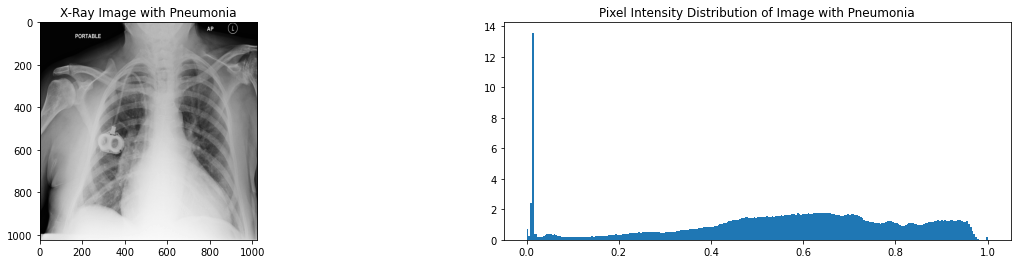

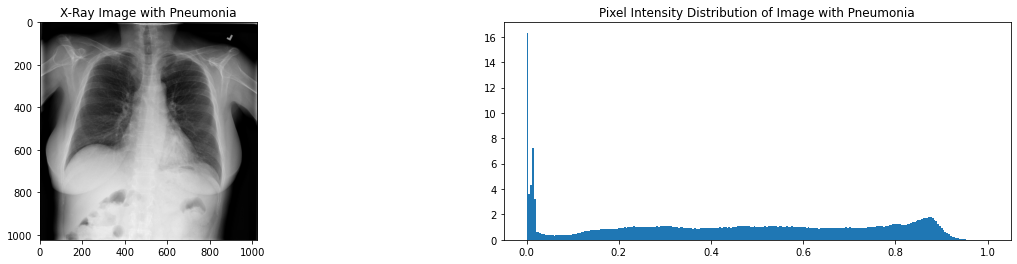

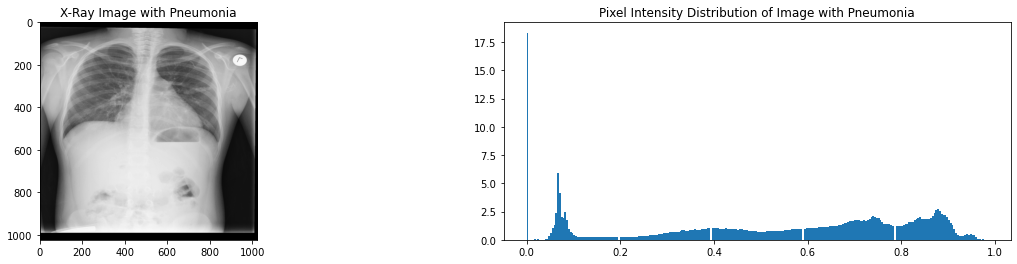

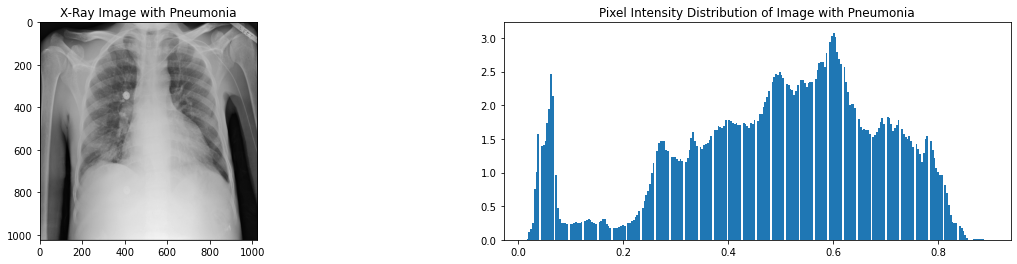

In [51]:
for i, row in sample_df[sample_df['Pneumonia'] == 1].iterrows():
    path = os.path.join("/data/images_002/images/", row['Image Index'])
    if not os.path.exists(path):
        #print('Invalid Path..')
        continue
    else:
        plot_images(path)
    
    

## Analysis 5

From the above image and pixel intensity plotting we can clearly see that images with No Finding have skewed distribution, showing tendency towards bright intensity. So we can take advantage of such pattern during training of ML model. Our model trained over lots of labelled image data will be capable to easliy filtering out non finding images. We can also see that distribution of infiltration looks very similar to pneumonia. Hence, we can potentially group them together and label them as positive labels for training.
